In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

data = pd.read_csv('LondonGCSE.csv')

In [2]:
from importlib import reload
reload(sns)

<module 'seaborn' from 'C:\\Users\\SamFoong\\anaconda3\\lib\\site-packages\\seaborn\\__init__.py'>

In [3]:
data.head()

,URN,RELDENOM,ADMPOL_PT,EGENDER,TOTPUPS,TOTAL EXP,EXPPUP,PSEN_ALL,PTFSM6CLA1A,PTEBACENG_E_PTQ_EE,PTEBACMAT_E_PTQ_EE,PTEBAC2SCI_E_PTQ_EE,PTEBACHUM_E_PTQ_EE,PTEBACLAN_E_PTQ_EE,PTEALGRP2,KS2APS,ATT8SCR_17,P8MEA_17,P8MEA,ATT8SCR
0,100049.0,1.0,2.0,3.0,950.0,9569373.0,10073.024210,0.12,0.59,0.94,0.98,0.92,0.70,0.32,0.71,27.6,38.4,-0.65,-0.11,42.4
1,100050.0,1.0,2.0,2.0,1170.0,8525007.0,7286.330769,0.10,0.54,0.98,0.99,0.98,0.89,0.63,0.42,29.7,55.2,0.42,0.77,58.7
2,100054.0,1.0,2.0,2.0,1025.0,7152177.0,6977.733659,0.24,0.36,0.99,1.00,0.99,0.65,0.87,0.55,30.8,63.5,0.65,0.73,63.4
3,100056.0,1.0,2.0,1.0,836.0,6431289.0,7692.929426,0.08,0.52,0.99,0.98,0.99,0.98,0.87,0.59,29.7,47.6,-0.25,-0.44,46.3
4,100051.0,1.0,2.0,3.0,1003.0,8306574.0,8281.728814,0.12,0.73,0.99,1.00,1.00,0.90,0.61,0.74,28.0,39.4,-0.16,-0.19,42.2


In [4]:
data.shape

(61032, 20)

In [5]:
data=data.dropna()
df=data.iloc[:,1:20]
df.shape

(336, 19)

In [6]:
df.head()

,RELDENOM,ADMPOL_PT,EGENDER,TOTPUPS,TOTAL EXP,EXPPUP,PSEN_ALL,PTFSM6CLA1A,PTEBACENG_E_PTQ_EE,PTEBACMAT_E_PTQ_EE,PTEBAC2SCI_E_PTQ_EE,PTEBACHUM_E_PTQ_EE,PTEBACLAN_E_PTQ_EE,PTEALGRP2,KS2APS,ATT8SCR_17,P8MEA_17,P8MEA,ATT8SCR
0,1.0,2.0,3.0,950.0,9569373.0,10073.024210,0.12,0.59,0.94,0.98,0.92,0.70,0.32,0.71,27.6,38.4,-0.65,-0.11,42.4
1,1.0,2.0,2.0,1170.0,8525007.0,7286.330769,0.10,0.54,0.98,0.99,0.98,0.89,0.63,0.42,29.7,55.2,0.42,0.77,58.7
2,1.0,2.0,2.0,1025.0,7152177.0,6977.733659,0.24,0.36,0.99,1.00,0.99,0.65,0.87,0.55,30.8,63.5,0.65,0.73,63.4
3,1.0,2.0,1.0,836.0,6431289.0,7692.929426,0.08,0.52,0.99,0.98,0.99,0.98,0.87,0.59,29.7,47.6,-0.25,-0.44,46.3
4,1.0,2.0,3.0,1003.0,8306574.0,8281.728814,0.12,0.73,0.99,1.00,1.00,0.90,0.61,0.74,28.0,39.4,-0.16,-0.19,42.2


In [7]:
cols=df.corr().nlargest(19,'ATT8SCR')['ATT8SCR'].index
print(cols)

Index(['ATT8SCR', 'ATT8SCR_17', 'P8MEA', 'KS2APS', 'P8MEA_17',
       'PTEBACLAN_E_PTQ_EE', 'PTEBACENG_E_PTQ_EE', 'PTEBACMAT_E_PTQ_EE',
       'PTEBACHUM_E_PTQ_EE', 'RELDENOM', 'TOTPUPS', 'PTEBAC2SCI_E_PTQ_EE',
       'TOTAL EXP', 'PTEALGRP2', 'PSEN_ALL', 'EXPPUP', 'ADMPOL_PT', 'EGENDER',
       'PTFSM6CLA1A'],
      dtype='object')


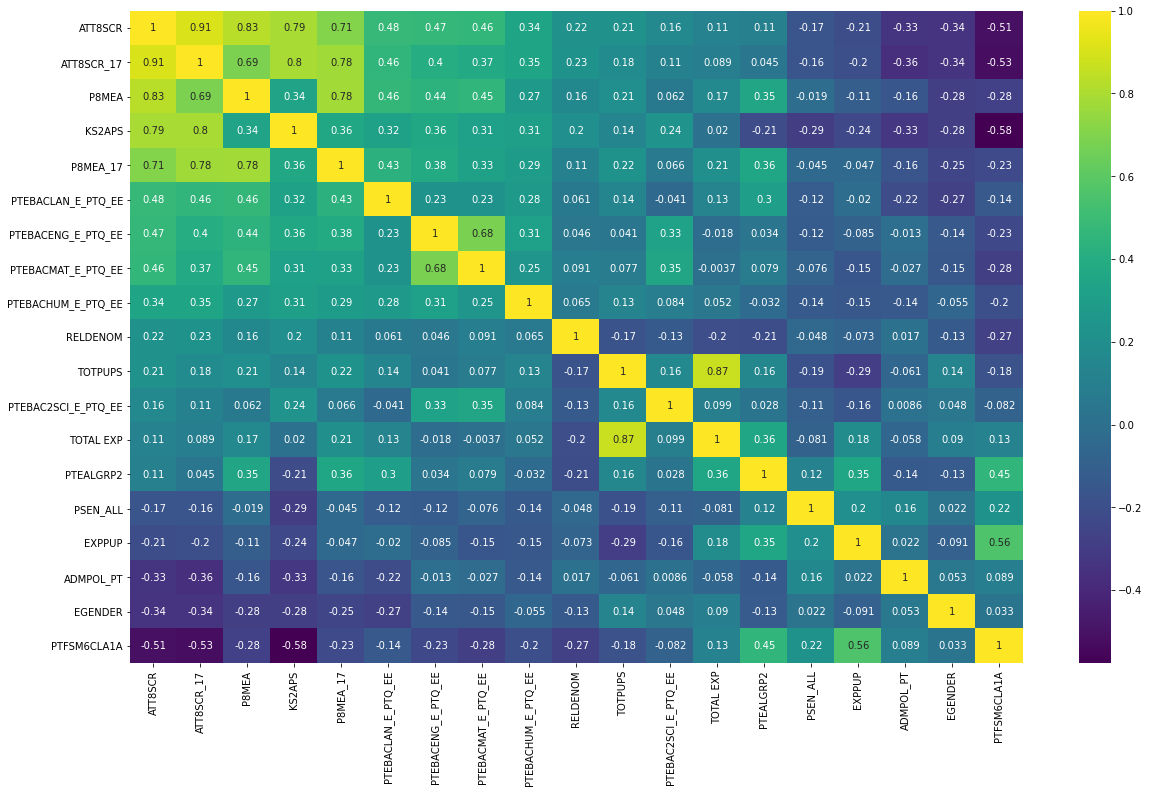

In [8]:
plt.figure(figsize=(20,12))
sns.heatmap(df[cols].corr(),annot=True,cmap='viridis')

C:\Users\SamFoong\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


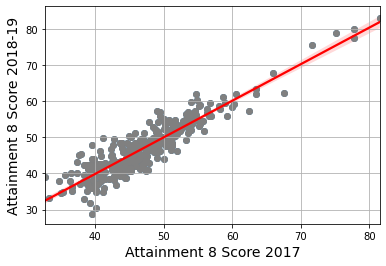

In [9]:
sns.regplot(df['ATT8SCR_17'], df['ATT8SCR'], line_kws={"color": "red"})
plt.scatter(df['ATT8SCR_17'], df['ATT8SCR'], color='grey')
plt.xlabel('Attainment 8 Score 2017', fontsize=14)
plt.ylabel('Attainment 8 Score 2018-19', fontsize=14)
plt.grid(True)
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression as lr

def rss(x, y, a, b):
    '''
    This function calculates the RSS for the model y = a*x + b value given:
    - x: a list
    - y: a list
    - a: a float
    - b: a float
    '''
    x = np.asarray(x) #Cast to numpy array so that we can do arithmatic with arrays
    y = np.asarray(y)
    
    y_predicted = a*x+b # This is an array. Uncomment next line to see
    # print y_predicted 
    residuals = y - y_predicted
    
    return sum(pow(residuals, 2))

def tss(y):
    ymean = np.mean(y)
    return sum(pow((y - ymean), 2))

def r2metric(x, y, a, b):
    return 1 - rss(x, y, a, b) / tss(y)

xlab = 'ATT8SCR_17'
ylab = 'ATT8SCR'

X = df[xlab].values.reshape(-1, 1)
y = df[ylab].values.reshape(-1, 1)
linearModel = lr()
linearModel.fit(X, y)

# extracting model parameters
a = linearModel.coef_[0][0]
b = linearModel.intercept_[0]

y_predicted = a * X + b  # calculating the line of best fit

print(r'R2 is: {}'.format(r2metric(X, y, a, b)))

R2 is: [0.83483031]


C:\Users\SamFoong\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


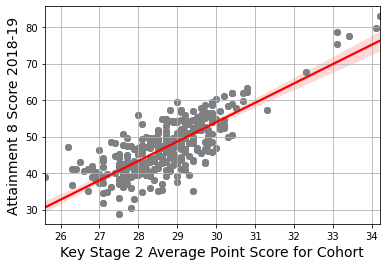

In [11]:
sns.regplot(df['KS2APS'], df['ATT8SCR'], line_kws={"color": "red"})
plt.scatter(df['KS2APS'], df['ATT8SCR'], color='grey')
plt.xlabel('Key Stage 2 Average Point Score for Cohort', fontsize=14)
plt.ylabel('Attainment 8 Score 2018-19', fontsize=14)
plt.grid(True)
plt.show()

In [12]:
xlab = 'KS2APS'
ylab = 'ATT8SCR'

X = df[xlab].values.reshape(-1, 1)
y = df[ylab].values.reshape(-1, 1)
linearModel = lr()
linearModel.fit(X, y)

# extracting model parameters
a = linearModel.coef_[0][0]
b = linearModel.intercept_[0]

y_predicted = a * X + b  # calculating the line of best fit

print(r'R2 is: {}'.format(r2metric(X, y, a, b)))

R2 is: [0.62979777]


C:\Users\SamFoong\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


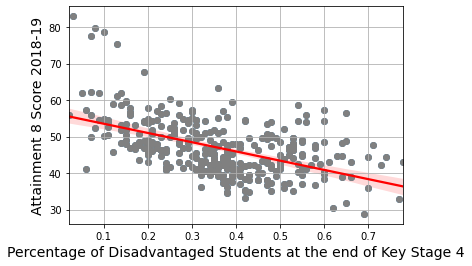

In [13]:
sns.regplot(df['PTFSM6CLA1A'], df['ATT8SCR'], line_kws={"color": "red"})
plt.scatter(df['PTFSM6CLA1A'], df['ATT8SCR'], color='grey')
plt.xlabel('Percentage of Disadvantaged Students at the end of Key Stage 4', fontsize=14)
plt.ylabel('Attainment 8 Score 2018-19', fontsize=14)
plt.grid(True)
plt.show()

In [14]:
xlab = 'PTFSM6CLA1A'
ylab = 'ATT8SCR'

X = df[xlab].values.reshape(-1, 1)
y = df[ylab].values.reshape(-1, 1)
linearModel = lr()
linearModel.fit(X, y)

# extracting model parameters
a = linearModel.coef_[0][0]
b = linearModel.intercept_[0]

y_predicted = a * X + b  # calculating the line of best fit

print(r'R2 is: {}'.format(r2metric(X, y, a, b)))

R2 is: [0.26172011]


C:\Users\SamFoong\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


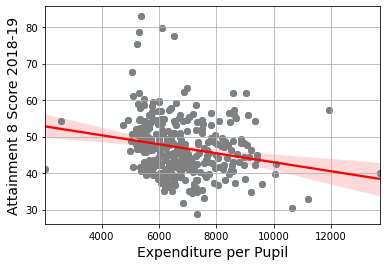

In [15]:
sns.regplot(df['EXPPUP'], df['ATT8SCR'], line_kws={"color": "red"})
plt.scatter(df['EXPPUP'], df['ATT8SCR'], color='grey')
plt.xlabel('Expenditure per Pupil', fontsize=14)
plt.ylabel('Attainment 8 Score 2018-19', fontsize=14)
plt.grid(True)
plt.show()

In [16]:
xlab = 'EXPPUP'
ylab = 'ATT8SCR'

X = df[xlab].values.reshape(-1, 1)
y = df[ylab].values.reshape(-1, 1)
linearModel = lr()
linearModel.fit(X, y)

# extracting model parameters
a = linearModel.coef_[0][0]
b = linearModel.intercept_[0]

y_predicted = a * X + b  # calculating the line of best fit

print(r'R2 is: {}'.format(r2metric(X, y, a, b)))

R2 is: [0.04388681]


Text(0.5, 0, 'Entry Gender')

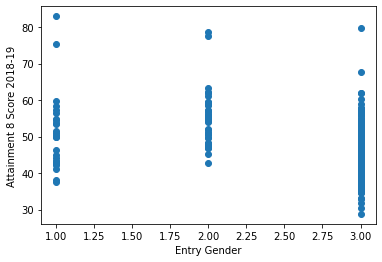

In [17]:
plt.plot(df['EGENDER'], df['ATT8SCR'], marker='o',linestyle='')
plt.ylabel('Attainment 8 Score 2018-19')
plt.xlabel('Entry Gender')

Text(0.5, 0, 'Admissions Policy')

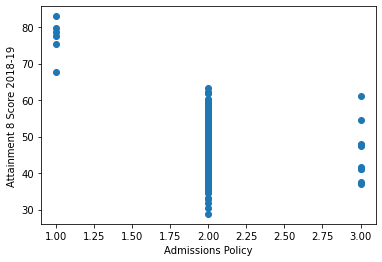

In [18]:
plt.plot(df['ADMPOL_PT'], df['ATT8SCR'], marker='o',linestyle='')
plt.ylabel('Attainment 8 Score 2018-19')
plt.xlabel('Admissions Policy')

In [19]:
df['ATT8SCR'].index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            326, 327, 328, 329, 330, 331, 332, 333, 334, 335],
           dtype='int64', length=336)

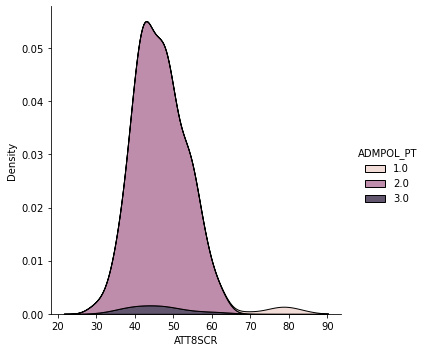

In [20]:
sns.displot(df, x="ATT8SCR", hue="ADMPOL_PT", kind="kde", multiple="stack")

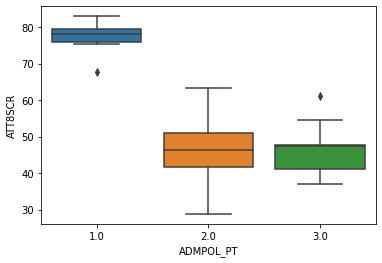

In [25]:
sns.boxplot(x=df['ADMPOL_PT'], y=df['ATT8SCR'], data=df)

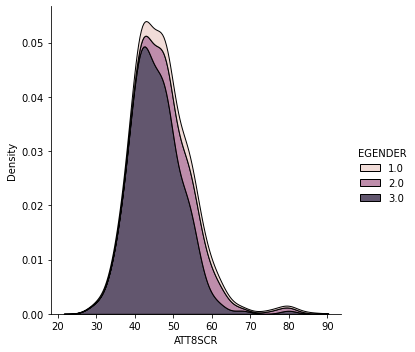

In [27]:
sns.displot(df, x="ATT8SCR", hue="EGENDER", kind="kde", multiple="stack")

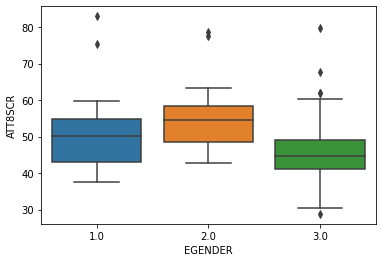

In [23]:
sns.boxplot(x=df['EGENDER'], y=df['ATT8SCR'], data=df)